In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
import keras.backend as K

import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.8
1.4.0-rc0


In [3]:
base = np.arange(0,101)
base

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [4]:
# first try without removal training data
numa = np.random.choice(base,1000000)
numb = np.random.choice(base,1000000)
numc = numa+numb
numa, numb, numc, len(numc)

(array([28, 45, 18, ..., 34, 63, 77]),
 array([42, 82, 91, ..., 74, 38, 12]),
 array([ 70, 127, 109, ..., 108, 101,  89]),
 1000000)

In [5]:
# validation data
testa = np.random.choice(base,100000)
testb = np.random.choice(base,100000)
testc = testa + testb
testa,testb,testc,len(testc)

(array([27, 72, 72, ..., 36, 18, 84]),
 array([62, 95,  5, ..., 63, 43, 95]),
 array([ 89, 167,  77, ...,  99,  61, 179]),
 100000)

In [6]:
x_train = np.array(list(zip(numa,numb)))
x_test = np.array(list(zip(testa,testb)))
x_train.shape, x_test.shape

((1000000, 2), (100000, 2))

In [7]:
x_train

array([[28, 42],
       [45, 82],
       [18, 91],
       ..., 
       [34, 74],
       [63, 38],
       [77, 12]])

In [8]:
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
x_train = x_train/100
x_test = x_test/100
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

#numcc = numc/100
#testcc = testc/100

n_classes = 201
# convert class vectors to binary One Hot Encoded
y_train = keras.utils.to_categorical(numc, n_classes)
y_test = keras.utils.to_categorical(testc, n_classes)
y_train[0],y_train.shape,y_test.shape

(1000000, 2) train samples
(100000, 2) test samples


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [9]:
y_train[0].argmax()

70

In [10]:
x_train

array([[ 0.28,  0.42],
       [ 0.45,  0.82],
       [ 0.18,  0.91],
       ..., 
       [ 0.34,  0.74],
       [ 0.63,  0.38],
       [ 0.77,  0.12]])

In [11]:
1024*2

2048

In [12]:
# Training Parameters for basic MNIST
learning_rate = 0.01
training_epochs = 100
batch_size = 2048

# Network Parameters
n_input = 2 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 200   # 1st layer number of neurons
n_hidden_2 = 400  #2nd layer number of neurons
n_hidden_3 = 201  # 3rd layer number of neurons
n_classes = 201   # MNIST classes for prediction(digits 0-9 )

In [13]:
Inp = Input(shape=(2,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.1)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
x = Dropout(0.2)(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

In [14]:
model = Model(Inp, output)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 200)               600       
_________________________________________________________________
Dense_2 (Dense)              (None, 400)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 201)               80601     
_________________________________________________________________
dropout_2 (Dropout)          (None, 201)               0         
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               40602     
Total para

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
K.set_value(model.optimizer.lr, learning_rate)

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 1000000 samples, validate on 100000 samples
Epoch 1/100
1000000/1000000 [==============================] - 22s - loss: 2.5929 - acc: 0.1606 - val_loss: 1.6646 - val_acc: 0.3803
Epoch 2/100
  18432/1000000 [..............................] - ETA: 21s - loss: 2.0975 - acc: 0.2215

In [19]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

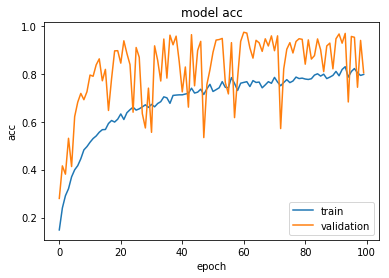

In [20]:
plot_train(history)

# with removals, 10 numbers

In [21]:
#numremov = np.array([50,51,52,53,54])
base5 = base[(base<90)]
base5, base5.shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), (90,))

In [22]:
# remove 5 numbers
numa = np.random.choice(base5,2000000)
numb = np.random.choice(base5,2000000)
numc = numa+numb

# validation data
testa = np.random.choice(base,20000)
testb = np.random.choice(base,20000)
testc = testa + testb


In [23]:
90 in testa,99 in testa,95 in testa,53 in testa,54 in testa

(True, True, True, True, True)

In [24]:
x_train = np.array(list(zip(numa,numb)))
x_test = np.array(list(zip(testa,testb)))
x_train.shape, x_test.shape

x_train = x_train/100
x_test = x_test/100
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

numcc = numc/100
testcc = testc/100

n_classes = 201
# convert class vectors to binary One Hot Encoded
y_train = keras.utils.to_categorical(numc, n_classes)
y_test = keras.utils.to_categorical(testc, n_classes)
y_train[0],y_train.shape,y_test.shape

(2000000, 2) train samples
(20000, 2) test samples


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

# Setting up Hyperparameters

In [25]:
# Training Parameters for basic MNIST
learning_rate = 0.01
training_epochs = 10
batch_size = 4096

# Network Parameters
n_input = 2 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 100   # 1st layer number of neurons
n_hidden_2 = 400  #2nd layer number of neurons
n_hidden_3 = 201  # 3rd layer number of neurons
n_classes = 201   # MNIST classes for prediction(digits 0-9 )

In [26]:
Inp = Input(shape=(2,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

In [27]:
model = Model(Inp, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
Dense_2 (Dense)              (None, 400)               40400     
_________________________________________________________________
Dense_3 (Dense)              (None, 201)               80601     
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               40602     
Total params: 161,903
Trainable params: 161,903
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 2000000 samples, validate on 20000 samples
Epoch 1/10
2000000/2000000 [==============================] - 22s - loss: 2.8116 - acc: 0.2008 - val_loss: 2.4599 - val_acc: 0.2435
Epoch 2/10
2000000/2000000 [==============================] - 22s - loss: 1.6354 - acc: 0.4160 - val_loss: 2.0005 - val_acc: 0.3990
Epoch 3/10
2000000/2000000 [==============================] - 22s - loss: 1.3090 - acc: 0.5362 - val_loss: 1.8073 - val_acc: 0.4908
Epoch 4/10
2000000/2000000 [==============================] - 22s - loss: 1.1005 - acc: 0.6236 - val_loss: 1.6244 - val_acc: 0.5431
Epoch 5/10
2000000/2000000 [==============================] - 22s - loss: 0.9388 - acc: 0.6951 - val_loss: 1.4862 - val_acc: 0.6215
Epoch 6/10
2000000/2000000 [==============================] - 22s - loss: 0.8150 - acc: 0.7463 - val_loss: 1.4017 - val_acc: 0.6448
Epoch 7/10
2000000/2000000 [==============================] - 22s - loss: 0.7297 - acc: 0.7787 - val_loss: 1.2892 - val_acc: 0.7525
Epoch 8/10
2000000/20000

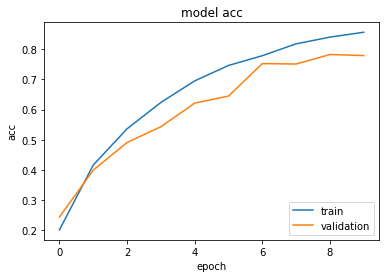

In [30]:
plot_train(history)

# Remove 20 numbers

In [31]:
# remove 20 numbers

base5 = base[(base<80)]
base5, base5.shape

numa = np.random.choice(base5,2000000)
numb = np.random.choice(base5,2000000)
numc = numa+numb

# validation data
testa = np.random.choice(base,20000)
testb = np.random.choice(base,20000)
testc = testa + testb

In [32]:
x_train = np.array(list(zip(numa,numb)))
x_test = np.array(list(zip(testa,testb)))
x_train.shape, x_test.shape

x_train = x_train/100
x_test = x_test/100
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

numcc = numc/100
testcc = testc/100

n_classes = 201
# convert class vectors to binary One Hot Encoded
y_train = keras.utils.to_categorical(numc, n_classes)
y_test = keras.utils.to_categorical(testc, n_classes)
#y_train[0],y_train.shape,y_test.shape

(2000000, 2) train samples
(20000, 2) test samples


In [33]:
# Training Parameters for basic MNIST
learning_rate = 0.01
training_epochs = 10
batch_size = 4096

# Network Parameters
n_input = 2 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 100   # 1st layer number of neurons
n_hidden_2 = 400  #2nd layer number of neurons
n_hidden_3 = 201  # 3rd layer number of neurons
n_classes = 201   # MNIST classes for prediction(digits 0-9 )

In [34]:
Inp = Input(shape=(2,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

In [35]:
model = Model(Inp, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
Dense_2 (Dense)              (None, 400)               40400     
_________________________________________________________________
Dense_3 (Dense)              (None, 201)               80601     
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               40602     
Total params: 161,903
Trainable params: 161,903
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 2000000 samples, validate on 20000 samples
Epoch 1/10
2000000/2000000 [==============================] - 22s - loss: 2.6286 - acc: 0.2487 - val_loss: 4.7335 - val_acc: 0.3122
Epoch 2/10
2000000/2000000 [==============================] - 22s - loss: 1.3524 - acc: 0.5414 - val_loss: 4.3996 - val_acc: 0.4098
Epoch 3/10
2000000/2000000 [==============================] - 22s - loss: 1.0222 - acc: 0.6805 - val_loss: 4.2224 - val_acc: 0.4453
Epoch 4/10
2000000/2000000 [==============================] - 22s - loss: 0.8101 - acc: 0.7747 - val_loss: 4.1034 - val_acc: 0.5268
Epoch 5/10
2000000/2000000 [==============================] - 22s - loss: 0.6639 - acc: 0.8319 - val_loss: 4.0086 - val_acc: 0.5640
Epoch 6/10
2000000/2000000 [==============================] - 22s - loss: 0.5521 - acc: 0.8653 - val_loss: 3.9924 - val_acc: 0.5976
Epoch 7/10
2000000/2000000 [==============================] - 22s - loss: 0.4611 - acc: 0.8969 - val_loss: 4.0604 - val_acc: 0.5858
Epoch 8/10
2000000/20000

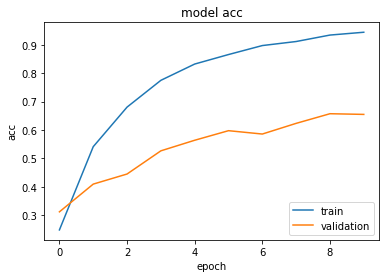

In [38]:
plot_train(history)

# Remove 30 numbers

In [39]:
# remove 30 numbers

base5 = base[(base<70)]
base5, base5.shape

numa = np.random.choice(base5,2000000)
numb = np.random.choice(base5,2000000)
numc = numa+numb

# validation data
testa = np.random.choice(base,20000)
testb = np.random.choice(base,20000)
testc = testa + testb

In [40]:
x_train = np.array(list(zip(numa,numb)))
x_test = np.array(list(zip(testa,testb)))
x_train.shape, x_test.shape

x_train = x_train/100
x_test = x_test/100
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

numcc = numc/100
testcc = testc/100

n_classes = 201
# convert class vectors to binary One Hot Encoded
y_train = keras.utils.to_categorical(numc, n_classes)
y_test = keras.utils.to_categorical(testc, n_classes)
#y_train[0],y_train.shape,y_test.shape

(2000000, 2) train samples
(20000, 2) test samples


In [41]:
# Training Parameters for basic MNIST
learning_rate = 0.01
training_epochs = 10
batch_size = 4096

# Network Parameters
n_input = 2 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 100   # 1st layer number of neurons
n_hidden_2 = 400  #2nd layer number of neurons
n_hidden_3 = 201  # 3rd layer number of neurons
n_classes = 201   # MNIST classes for prediction(digits 0-9 )

In [42]:
Inp = Input(shape=(2,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

In [43]:
model = Model(Inp, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
Dense_2 (Dense)              (None, 400)               40400     
_________________________________________________________________
Dense_3 (Dense)              (None, 201)               80601     
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               40602     
Total params: 161,903
Trainable params: 161,903
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 2000000 samples, validate on 20000 samples
Epoch 1/10
2000000/2000000 [==============================] - 22s - loss: 2.7297 - acc: 0.2244 - val_loss: 3.1965 - val_acc: 0.3602
Epoch 2/10
2000000/2000000 [==============================] - 22s - loss: 1.4963 - acc: 0.4791 - val_loss: 2.8630 - val_acc: 0.3857
Epoch 3/10
2000000/2000000 [==============================] - 22s - loss: 1.1792 - acc: 0.6039 - val_loss: 2.7197 - val_acc: 0.4662
Epoch 4/10
2000000/2000000 [==============================] - 22s - loss: 0.9751 - acc: 0.6820 - val_loss: 2.5742 - val_acc: 0.5181
Epoch 5/10
2000000/2000000 [==============================] - 22s - loss: 0.8268 - acc: 0.7407 - val_loss: 2.4889 - val_acc: 0.5877
Epoch 6/10
2000000/2000000 [==============================] - 22s - loss: 0.7133 - acc: 0.7866 - val_loss: 2.4076 - val_acc: 0.6561
Epoch 7/10
2000000/2000000 [==============================] - 22s - loss: 0.6262 - acc: 0.8254 - val_loss: 2.3100 - val_acc: 0.7073
Epoch 8/10
2000000/20000

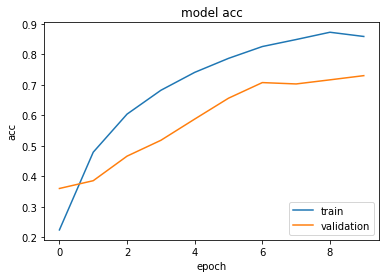

In [46]:
plot_train(history)